### Data Analysis
We start by importing all required libraries for the program

In [1]:
import wfdb
from sklearn.model_selection import train_test_split

import numpy as np
import ecgclassification as ecg

db = 'ecgclassification/mitdb/'
beats = ecg.load_beats(db)

Loading beats took 81.8s


After importing all files, we can count the occurrences of classes in all the records of the MIT-BIH Arrhythmia database.
As can be seen, the number of classes of N are significantly more frequent in the dataset.

In [2]:
occurrences = ecg.count_occurrences(db)
ecg.print_table(occurrences)
total = ecg.count_total_occurrences(occurrences)
ecg.pretty_print(total)

Patient  Counters
100      {'N': 2239, 'A': 33, 'V': 1}
101      {'N': 1860, 'Q': 2, 'A': 3}
102      {'/': 2028, 'f': 56, 'N': 99, 'V': 4}
103      {'N': 2082, 'A': 2}
104      {'/': 1380, 'f': 666, 'Q': 18, 'N': 163, 'V': 2}
105      {'N': 2526, 'V': 41, 'Q': 5}
106      {'N': 1507, 'V': 520}
107      {'/': 2078, 'V': 59}
108      {'N': 1739, 'V': 17, 'F': 2, 'A': 4, 'j': 1}
109      {'L': 2492, 'F': 2, 'V': 38}
111      {'L': 2123, 'V': 1}
112      {'N': 2537, 'A': 2}
113      {'N': 1789, 'a': 6}
114      {'N': 1820, 'V': 43, 'J': 2, 'F': 4, 'A': 10}
115      {'N': 1953}
116      {'N': 2302, 'V': 109, 'A': 1}
117      {'N': 1534, 'A': 1}
118      {'R': 2166, 'V': 16, 'A': 96}
119      {'N': 1543, 'V': 444}
121      {'N': 1861, 'A': 1, 'V': 1}
122      {'N': 2476}
123      {'N': 1515, 'V': 3}
124      {'R': 1531, 'J': 29, 'V': 47, 'F': 5, 'A': 2, 'j': 5}
200      {'V': 826, 'N': 1743, 'A': 30, 'F': 2}
201      {'N': 1625, 'a': 97, 'j': 10, 'V': 198, 'A': 30, 'J': 1, 'F': 2}
202      

Now that we have the total number of samples of classes in the dataset,
we can group them according to the AAMI heartbeat standard five classes.
Even though the number of samples have been resorted, there is still a skewed class distribution for the Normal class.

In [3]:
aami_total = ecg.count_aami(total)
ecg.pretty_print(aami_total)

Key      Value          
N        90631          
SVEB     2781           
VEB      7708           
Q        8043           
F        803            


Now we will demonstrate some samples out of these different classes.

Loading beats took 6.5s
[]
<class 'ecgclassification.beat.Beat'>
Beat signal lenght:  1024
Beat from patient:  100
Beat annotation symbol:  N
Numeric representation of corresponding AAMI class:  0


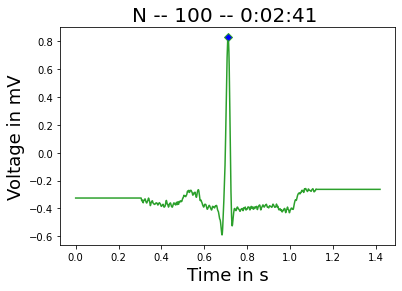

In [4]:
beats0 = ecg.load_beats(db, [100])
print(beats0)
N = beats[200]
print(type(N))

# Signal lenght will be the same as ecgc.config.window
print('Beat signal lenght: ', len(N.signal))
print('Beat from patient: ', N.patient)
print('Beat annotation symbol: ', N.ba)
print('Numeric representation of corresponding AAMI class: ', N.aami_num)
ecg.visualize_beat(N)

In [5]:
data = ecg.load_data_v2(db)
X_train, X_test, y_train, y_test = train_test_split(data['data'][0], data['data'][1], test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=1)

unique, counts = np.unique(y_train, return_counts=True)
print("Xtrain frequencies")
print(dict(zip(unique, counts)))

unique, counts = np.unique(y_val, return_counts=True)
print("Xval frequencies")
print(dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("Xtest frequencies")
print(dict(zip(unique, counts)))

Loading beats took 125.7s
Loading the signals took: 49.1s
Xtrain frequencies
{0: 54261, 1: 1695, 2: 4669, 3: 470, 4: 4770}
Xval frequencies
{0: 18078, 1: 554, 2: 1519, 3: 140, 4: 1664}
Xtest frequencies
{0: 18132, 1: 526, 2: 1513, 3: 192, 4: 1593}
